In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
df = pd.read_csv("Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [4]:
df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)

In [5]:
df["TaxInc"] = pd.cut(df["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [6]:
print(df)

     Taxable.Income  City.Population  Work.Experience  Undergrad_YES  \
0             68833            50047               10              0   
1             33700           134075               18              1   
2             36925           160205               30              0   
3             50190           193264               15              1   
4             81002            27533               28              0   
..              ...              ...              ...            ...   
595           76340            39492                7              1   
596           69967            55369                2              1   
597           47334           154058                0              0   
598           98592           180083               17              1   
599           96519           158137               16              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES TaxInc  
0                         0                      1          1   

In [7]:
df = pd.get_dummies(df,columns = ["TaxInc"],drop_first=True)

In [8]:
df.tail(10)

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,43018,85195,14,0,1,0,1,1
591,27394,132859,18,1,0,1,1,0
592,68152,75143,16,1,0,1,0,1
593,84775,131963,10,0,0,0,1,1
594,47364,97526,9,0,1,0,1,1
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1
599,96519,158137,16,0,0,0,0,1


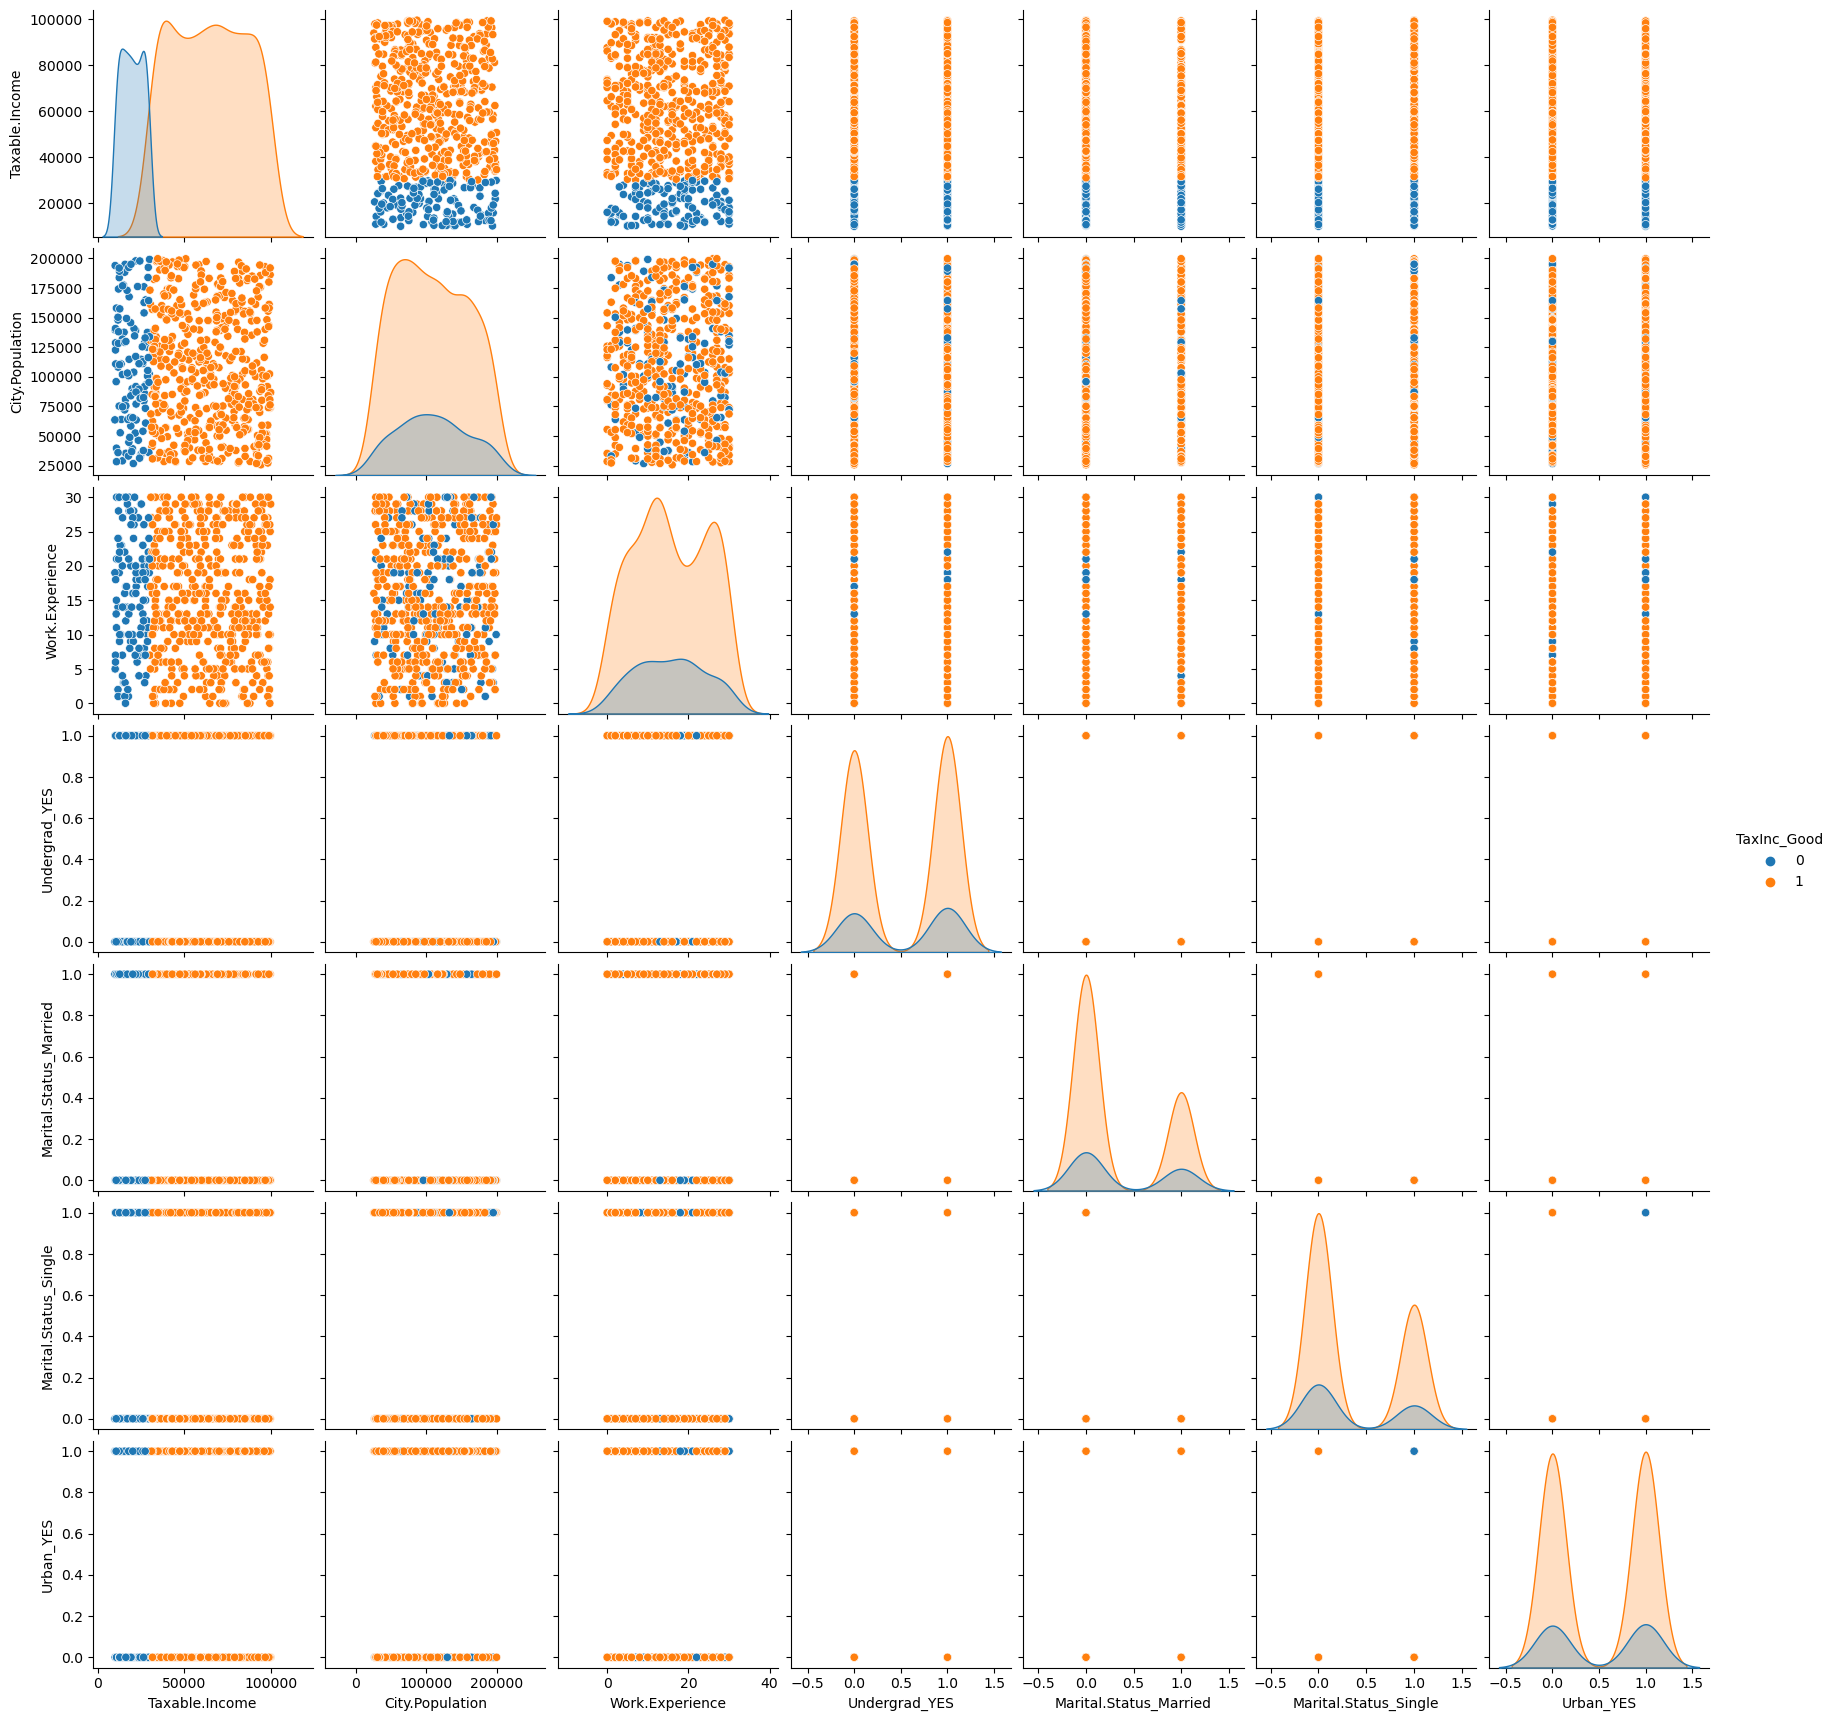

In [9]:
import seaborn as sns
sns.pairplot(data=df, hue = 'TaxInc_Good')

In [10]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [11]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.tail(10)

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,TaxInc_Good
590,0.341473,0.466667,0.0,1.0,0.0,1.0,1.0
591,0.615406,0.600000,1.0,0.0,1.0,1.0,0.0
592,0.283703,0.533333,1.0,0.0,1.0,0.0,1.0
593,0.610256,0.333333,0.0,0.0,0.0,1.0,1.0
594,0.412341,0.300000,0.0,1.0,0.0,1.0,1.0
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0
599,0.760683,0.533333,0.0,0.0,0.0,0.0,1.0


In [12]:
X = df_norm.drop(['TaxInc_Good'], axis=1)
y = df_norm['TaxInc_Good']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

In [15]:
df_norm["income"]="<=30000"
df_norm.loc[df["Taxable.Income"]>=30000,"income"]="Good"
df_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

In [16]:
df.drop(["Taxable.Income"],axis=1,inplace=True)

In [17]:
df.rename(columns={"Undergrad":"undergrad","Marital.Status":"marital","City.Population":"population","Work.Experience":"experience","Urban":"urban"},inplace=True)

In [18]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [19]:
features = df.iloc[:,0:5]
labels = df.iloc[:,5]

In [20]:
colnames = list(df.columns)
predictors = colnames[0:5]
target = colnames[5]

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size = 0.2,stratify = labels)

In [22]:
from sklearn.ensemble import RandomForestClassifier as RF
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy")
model.fit(x_train,y_train)

C:\Users\Tirumal\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(criterion='entropy', n_estimators=15, n_jobs=3,
                       oob_score=True)

In [23]:
model.estimators_
model.classes_
model.n_classes_

2

In [24]:
model.n_outputs_

1

In [25]:
model.oob_score_

0.50625

In [26]:
prediction = model.predict(x_train)

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train,prediction)

In [28]:
np.mean(prediction == y_train)

0.9854166666666667

In [29]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_train,prediction)

In [30]:
pred_test = model.predict(x_test)

In [31]:
acc_test =accuracy_score(y_test,pred_test)

In [32]:
from sklearn.tree import export_graphviz
from six import StringIO

In [33]:
tree = model.estimators_[5]

In [34]:
dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

In [35]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [36]:
from sklearn import tree

In [37]:
tree.plot_tree(model);

In [38]:
colnames = list(df.columns)
colnames

['population',
 'experience',
 'Undergrad_YES',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_YES',
 'TaxInc_Good']

In [39]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [40]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()  

1    61
0    59
dtype: int64

In [41]:
preds

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=uint8)

In [42]:
pd.crosstab(y_test,preds) 

col_0,0,1
Urban_YES,,
0,32,28
1,27,33


In [43]:
np.mean(preds==y_test)

0.5416666666666666

In [44]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [45]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [46]:
pred=model.predict(x_test)
np.mean(preds==y_test)

0.5416666666666666

In [47]:
from sklearn.tree import DecisionTreeRegressor

In [48]:
array = df.values
X = array[:,0:3]
y = array[:,3]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [50]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [51]:
model.score(X_test,y_test)

-0.8931902985074629

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=fn,
                   class_names=cn,
                   filled=True)

In [55]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [57]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.6990049751243781


array([[271,   1],
       [120,  10]], dtype=int64)

In [58]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test , y_test_pred)

0.6767676767676768


array([[134,   0],
       [ 64,   0]], dtype=int64)

In [59]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=fn,
                       class_names=cn,
                       filled=True)

In [60]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [61]:
dt = DecisionTreeClassifier(random_state=42)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [64]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [65]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [66]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001105,0.001241,0.000000,0.000000,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.683168,0.633663,0.68,0.62,0.654208,0.027822,21
1,0.003921,0.006792,0.000000,0.000000,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.683168,0.613861,0.64,0.62,0.639257,0.027132,27
2,0.000000,0.000000,0.003162,0.003561,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.584158,0.613861,0.62,0.62,0.609505,0.014847,32
3,0.000727,0.000727,0.000000,0.000000,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1
4,0.000633,0.000688,0.000000,0.000000,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1


In [67]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000727,0.000727,0.0,0.0,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1
4,0.000633,0.000688,0.0,0.0,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1
8,0.005875,0.004634,0.0,0.0,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1
9,0.000000,0.000000,0.0,0.0,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1
13,0.000000,0.000000,0.0,0.0,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.673267,0.673267,0.68,0.68,0.676634,0.003366,1


In [68]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_leaf=50, random_state=42)

In [69]:
dt_best = grid_search.best_estimator_

In [70]:
evaluate_model(dt_best)

Train Accuracy : 0.6766169154228856
Train Confusion Matrix:
[[272   0]
 [130   0]]
--------------------------------------------------
Test Accuracy : 0.6767676767676768
Test Confusion Matrix:
[[134   0]
 [ 64   0]]


In [71]:
get_dt_graph(dt_best)

In [72]:
get_dt_graph(dt_best)

In [73]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.6666666666666666


In [75]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.5909090909090909


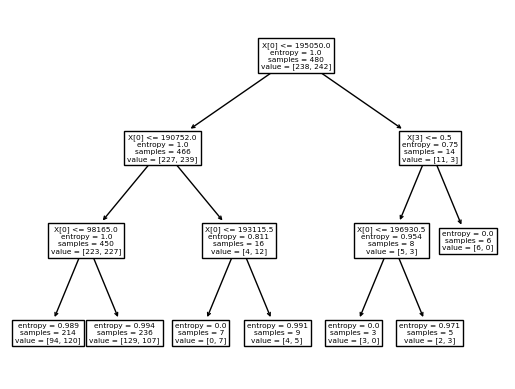

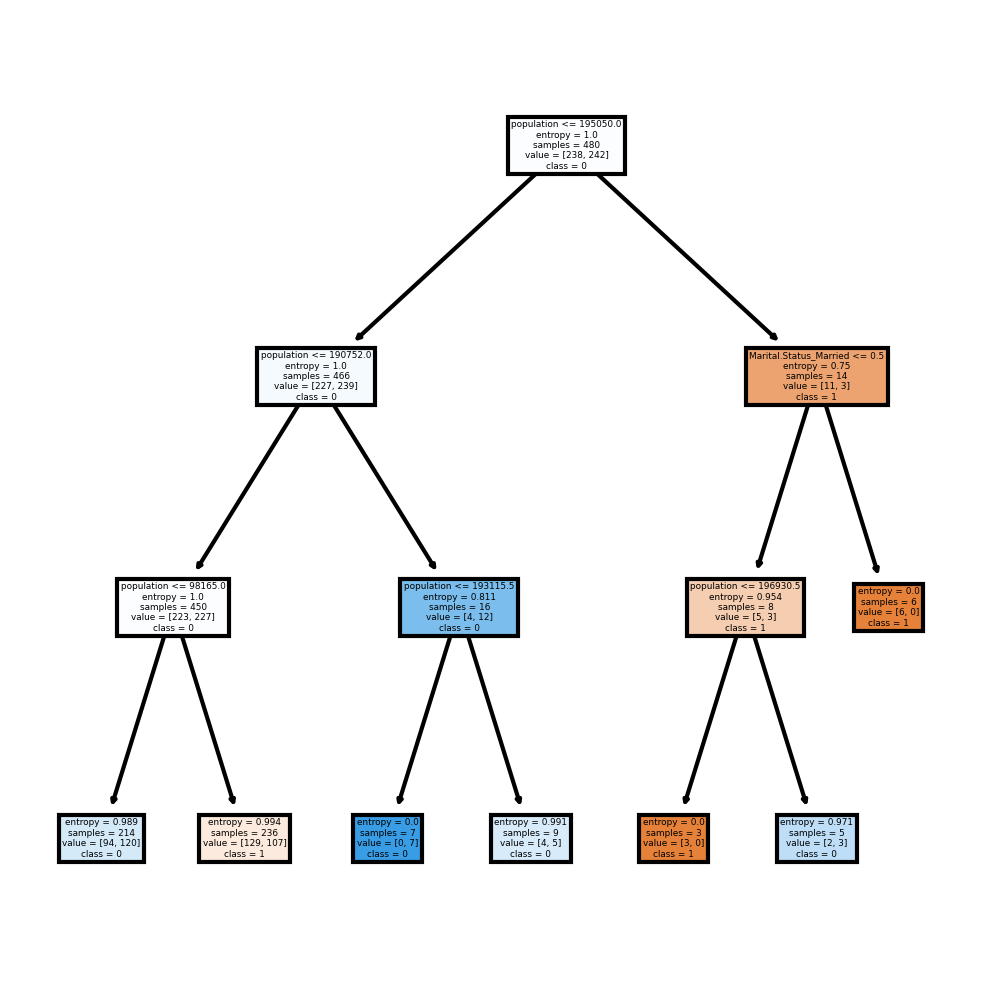

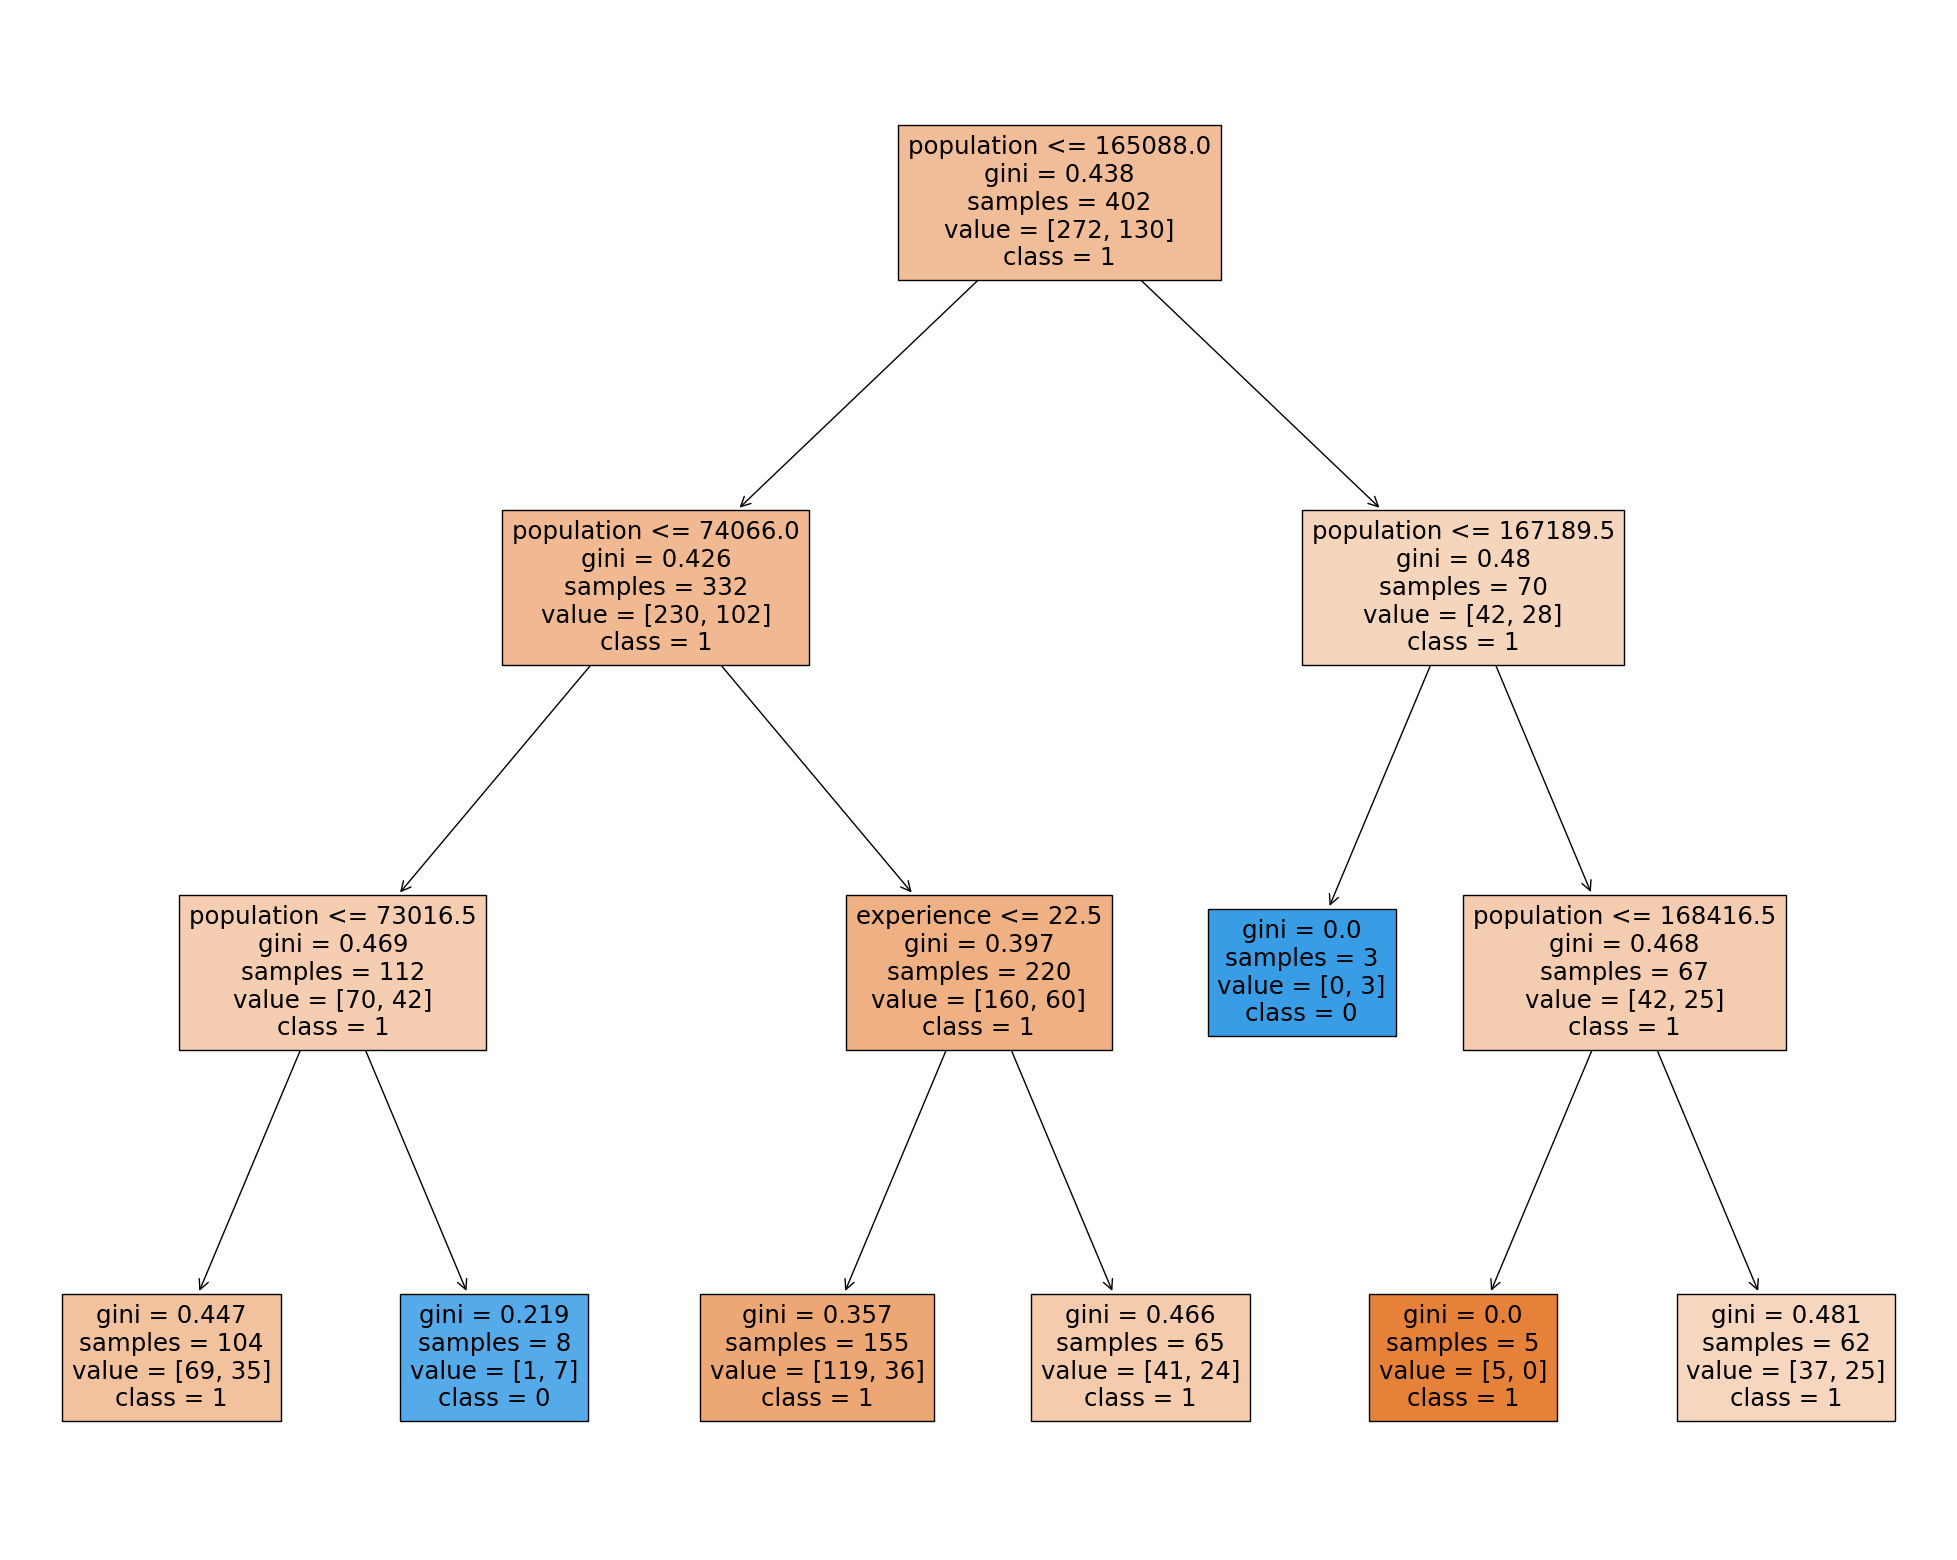

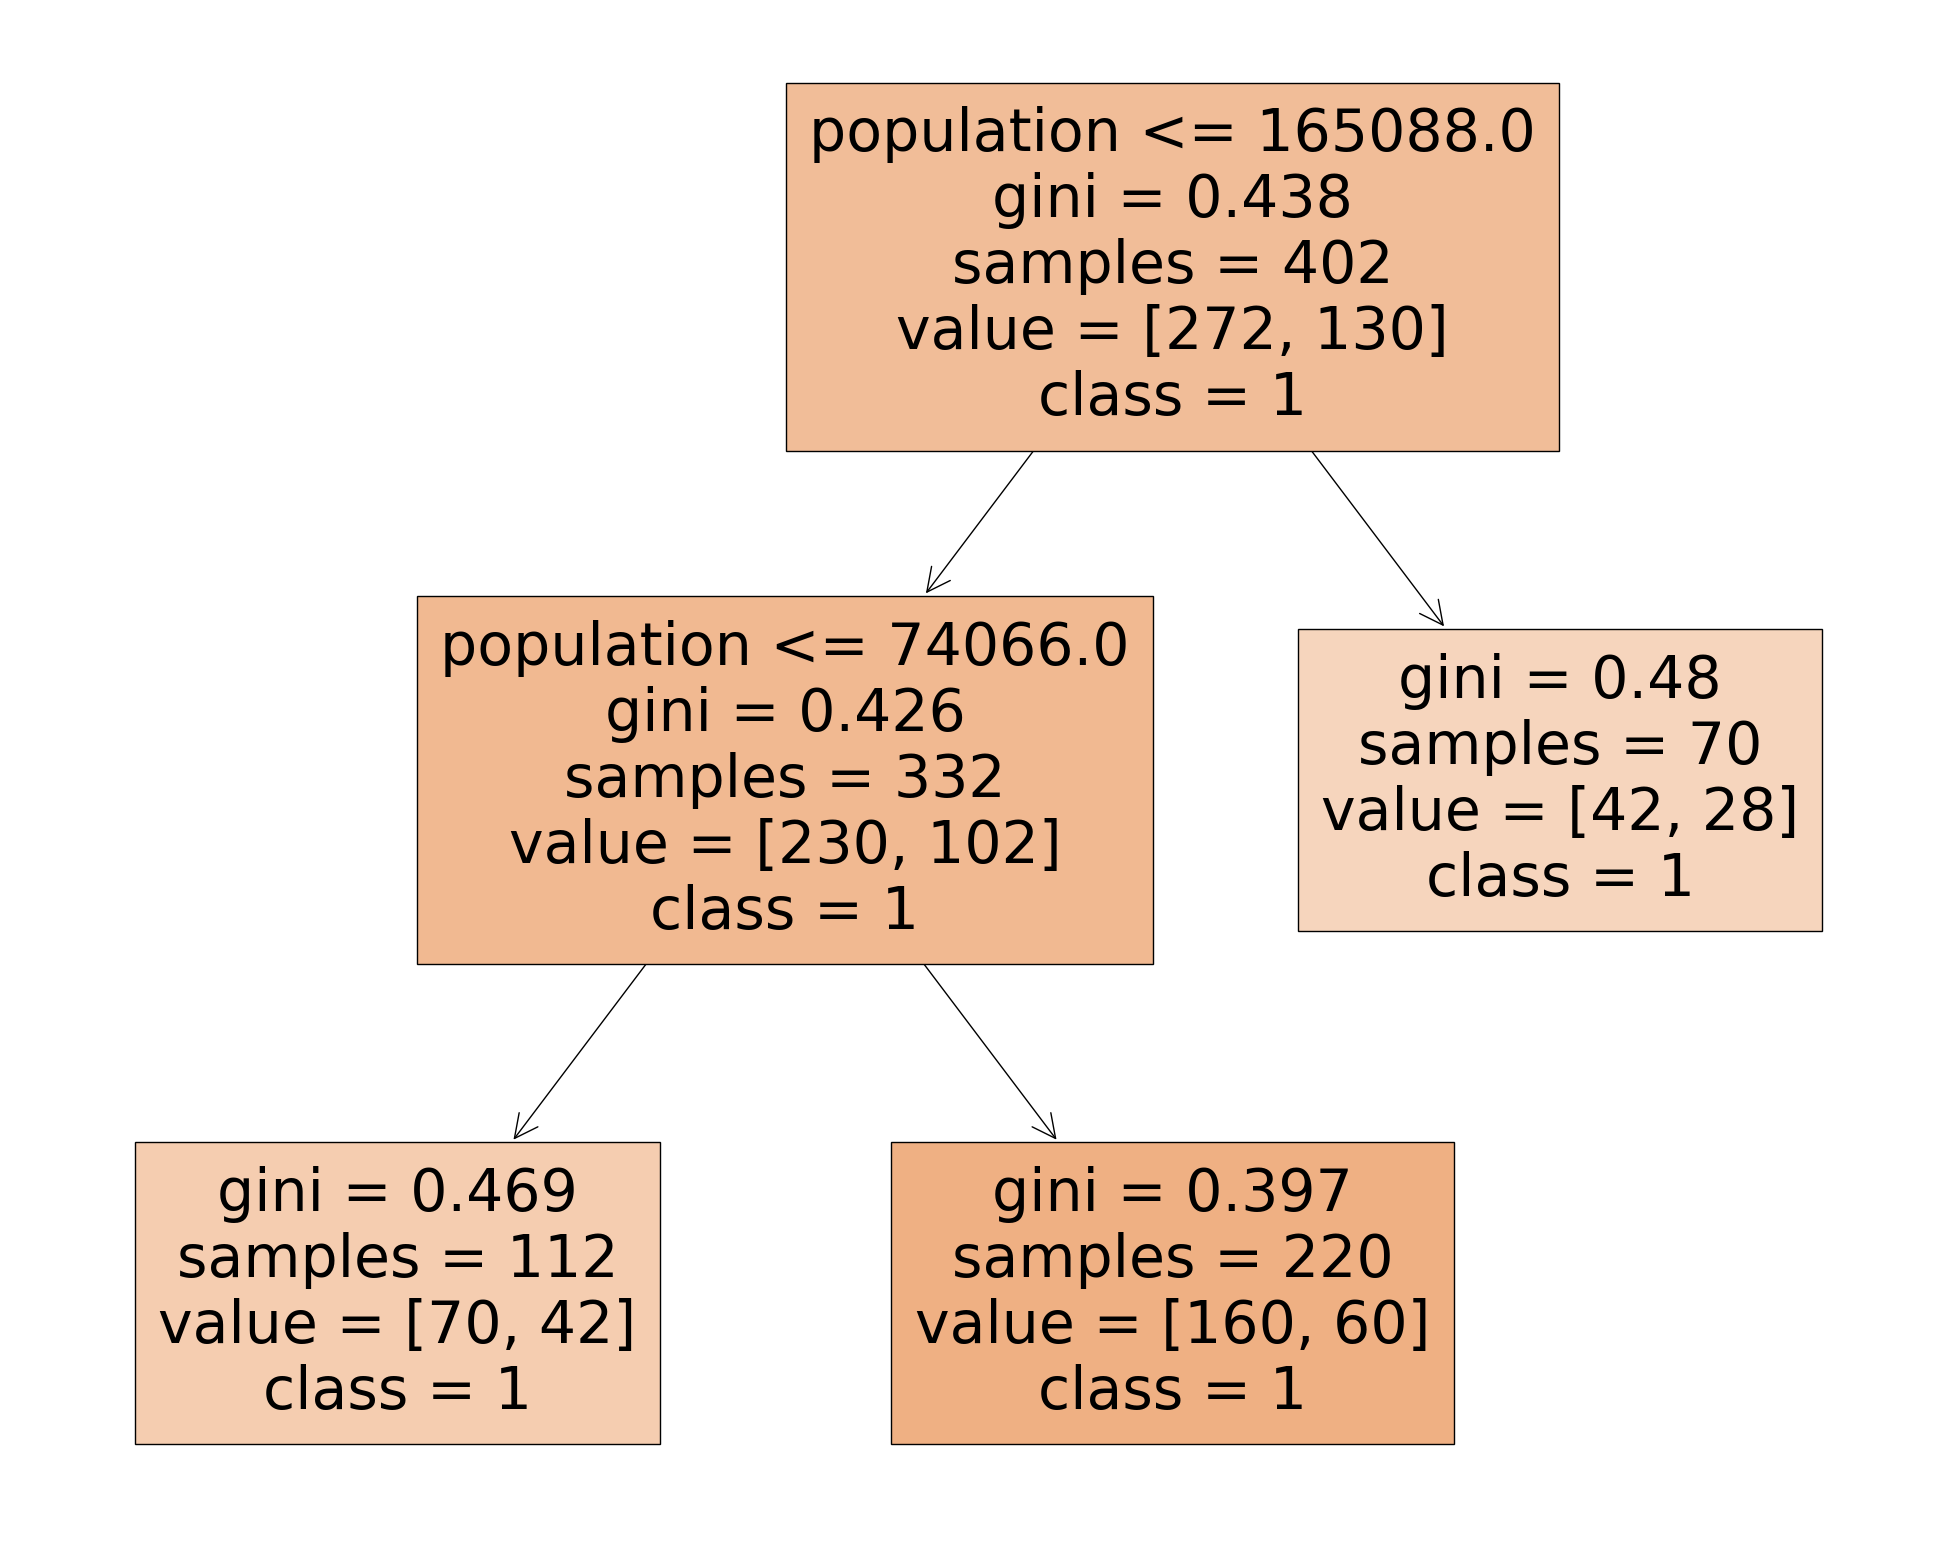

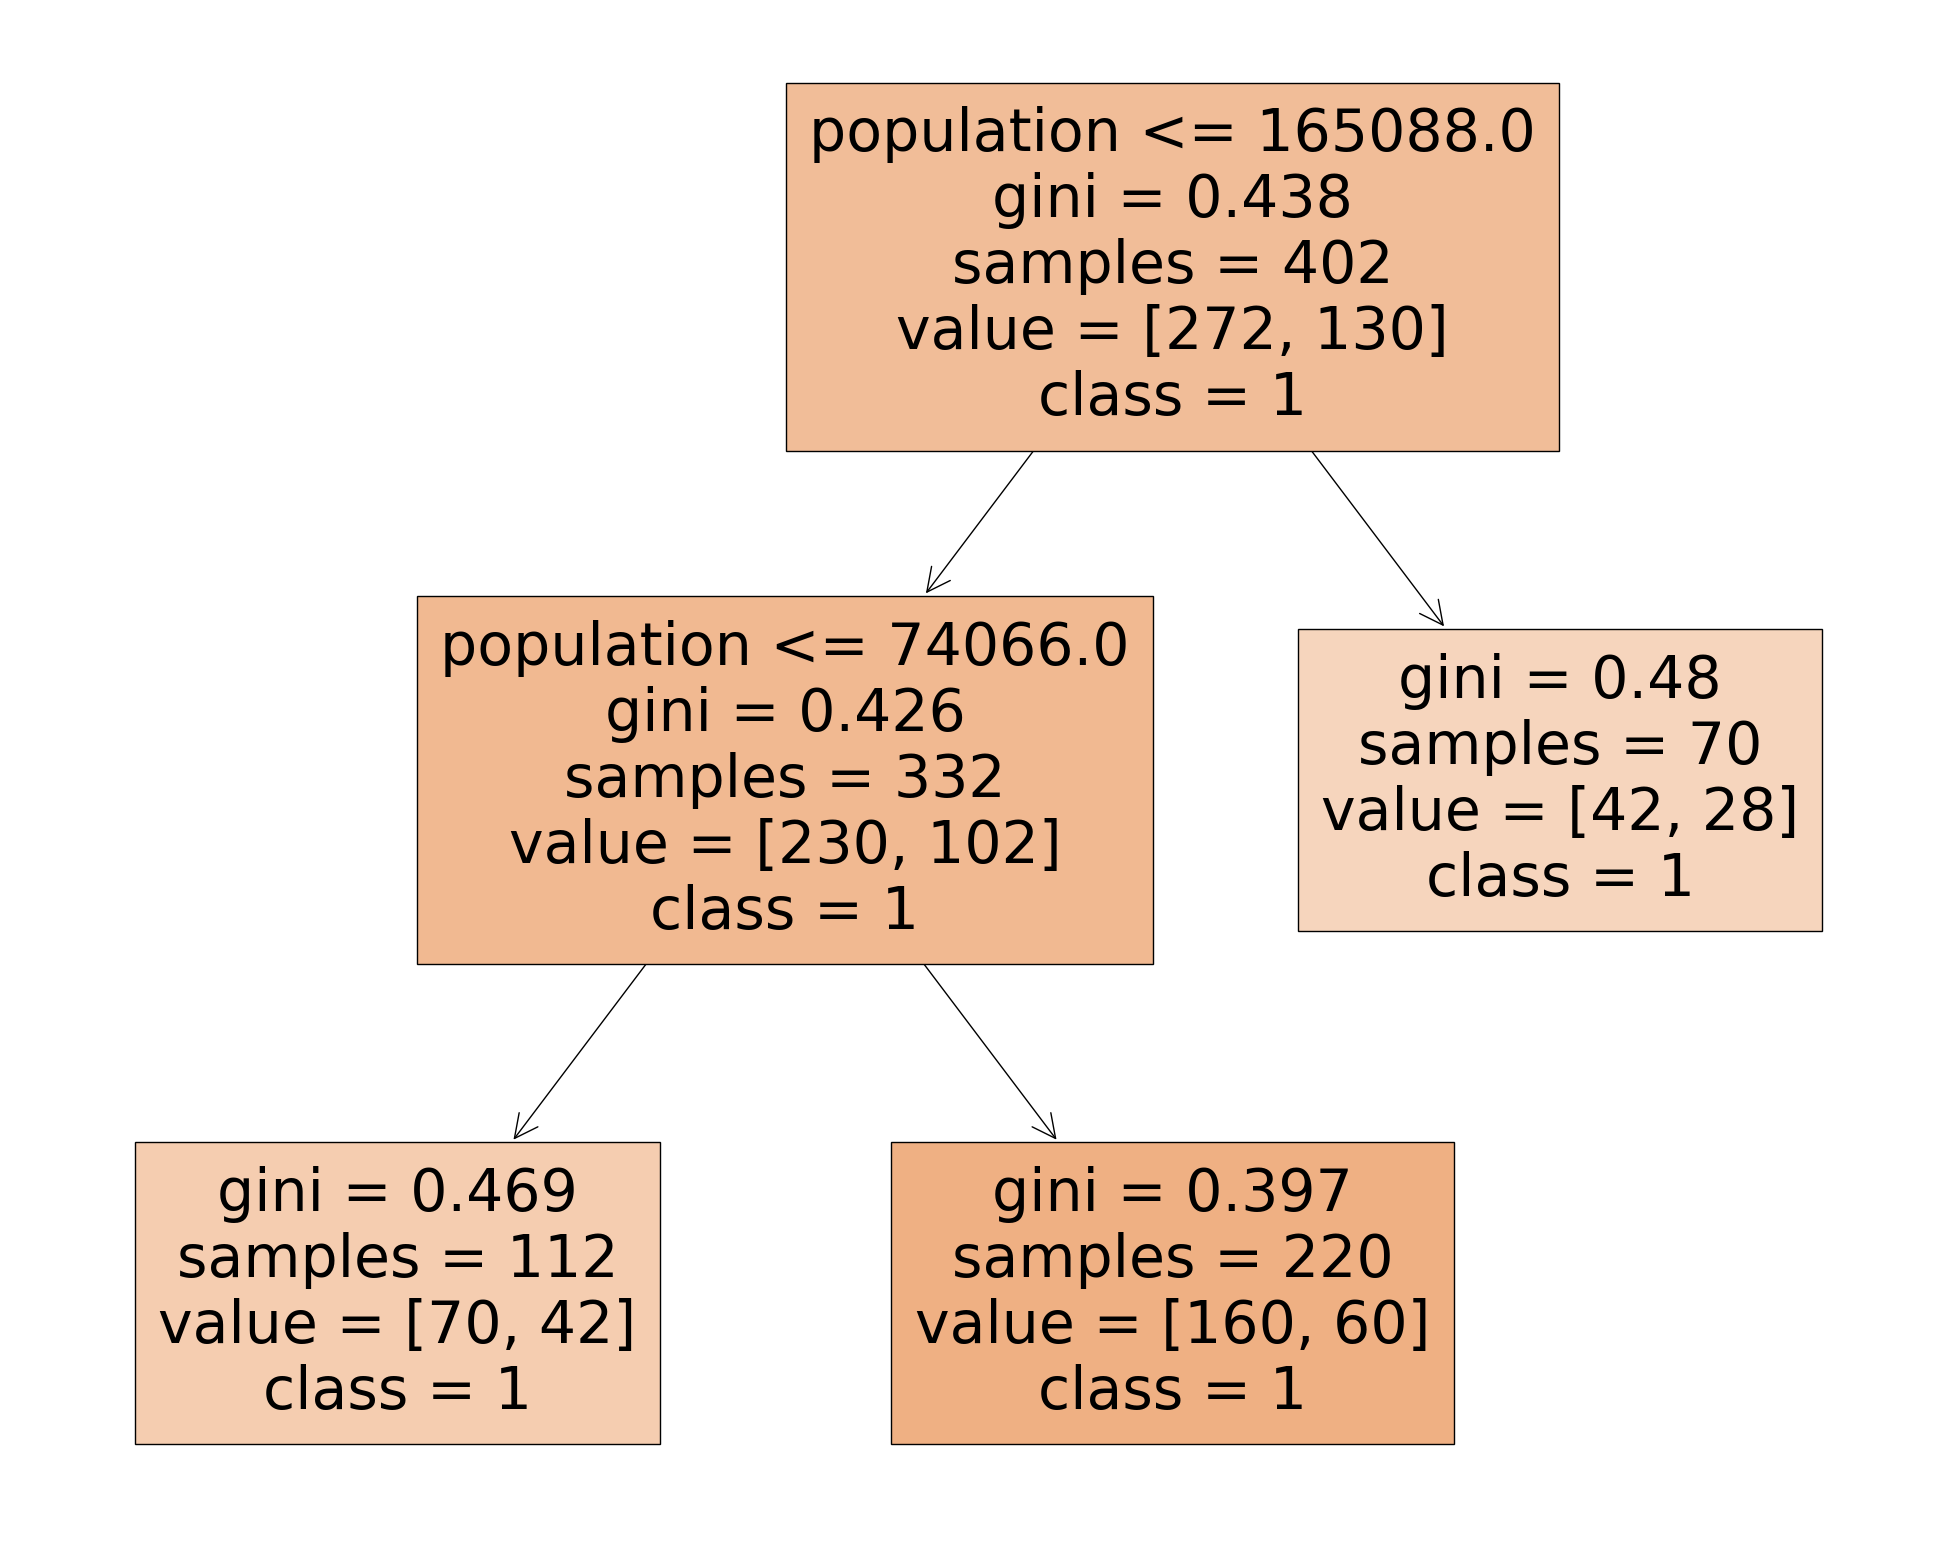

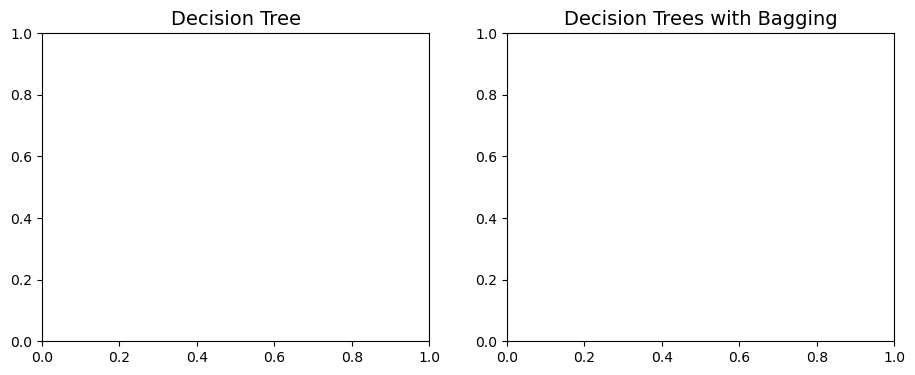

In [76]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate

In [78]:
Random_Forest_model = RandomForestClassifier(n_estimators=500,criterion="entropy")
Random_Forest_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [79]:
accuracy = cross_validate(Random_Forest_model,X_test,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Random Forests and scaled data: {:.2f}".format(Random_Forest_model.score(X_test,y_test)))

[0.55       0.5        0.75       0.65       0.7        0.55
 0.75       0.55       0.73684211 0.63157895]
Test set accuracy with Random Forests and scaled data: 0.57


In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [81]:
n = 100
maxdegree = 6
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [82]:
for degree in range(1,maxdegree):
    model = GradientBoostingRegressor(max_depth=degree, n_estimators=100, learning_rate=1.0)  
    model.fit(X_train_scaled,y_train)
    y_pred = model.predict(X_test_scaled)
    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred))**2 )
    variance[degree] = np.mean( np.var(y_pred) )
    print('Max depth:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

Max depth: 1
Error: 0.43432706185766634
Bias^2: 0.21404040944407776
Var: 0.2202866524135886
0.43432706185766634 >= 0.21404040944407776 + 0.2202866524135886 = 0.43432706185766634
Max depth: 2
Error: 0.4436835823078622
Bias^2: 0.21508673342915005
Var: 0.22859684887871223
0.4436835823078622 >= 0.21508673342915005 + 0.22859684887871223 = 0.4436835823078623
Max depth: 3
Error: 0.44368112391840997
Bias^2: 0.21508682882596922
Var: 0.22859429509244075
0.44368112391840997 >= 0.21508682882596922 + 0.22859429509244075 = 0.44368112391840997
Max depth: 4
Error: 0.44368112391840997
Bias^2: 0.21508682882596922
Var: 0.22859429509244075
0.44368112391840997 >= 0.21508682882596922 + 0.22859429509244075 = 0.44368112391840997
Max depth: 5
Error: 0.44368112391841
Bias^2: 0.21508682882596922
Var: 0.22859429509244075
0.44368112391841 >= 0.21508682882596922 + 0.22859429509244075 = 0.44368112391840997


C:\Users\Tirumal\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tirumal\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tirumal\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Tirumal\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

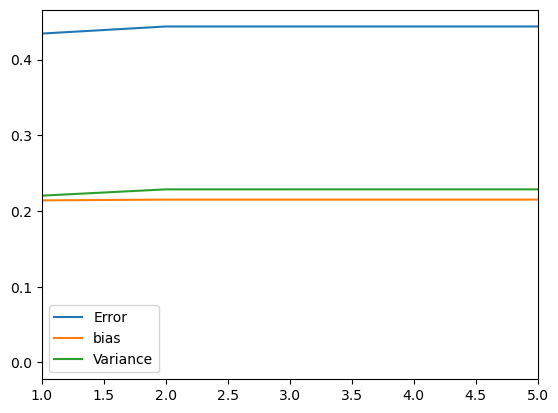

In [83]:
plt.xlim(1,maxdegree-1)
plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()